# Project Outline :

- We are going to scrape IMDb Website for Most Popular TV Shows and Most popular Movies
- url 1 = 'https://www.imdb.com/chart/tvmeter/?ref_=nv_mp_mptv'
- url 2 = 'https://www.imdb.com/chart/moviemeter/?ref_=nv_mp_mpm'
- We will make 2 data frames and make 2 different Analysis
- we will collect title, year of release, imdb rating


In [1]:
#import required libraries
import pandas as pd
import numpy as np
from bs4 import BeautifulSoup
import requests
import seaborn as sns
from matplotlib import pyplot as plt

In [2]:
movie_url = 'https://www.imdb.com/chart/moviemeter/?ref_=nv_mp_mpm'
tv_url = 'https://www.imdb.com/chart/tvmeter/?ref_=nv_mp_mptv'

movie = requests.get(movie_url)
tv = requests.get(tv_url)

In [3]:
movie.status_code

200

In [4]:
tv.status_code

200

In [5]:
movie_soup = BeautifulSoup(movie.text, 'html.parser')
tv_soup = BeautifulSoup(tv.text, 'html.parser')

### for Movie

In [6]:
# for movie
movie_main = movie_soup.find('tbody', class_='lister-list').find_all('tr')

In [15]:
movie1 = movie_main[0]

In [16]:
name = movie1.find('td', class_='titleColumn').a.text
year = movie1.find('td', class_='titleColumn').span.text.strip('()')
rating = movie1.find('td', class_='ratingColumn imdbRating').strong.text
    
print(name,year,rating)

Cocaine Bear 2023 6.4


In [35]:
movie_data = []
for movie in movie_main:
    name = movie.find('td', class_='titleColumn').a.text
    year = movie.find('td', class_='titleColumn').span.text.strip('()')
    # since we have null values in data, we have to do in this way to avoid errors
    rating_element = movie.find('td', class_='ratingColumn imdbRating')
    if rating_element is not None:
        rating_strong = rating_element.find('strong')
        if rating_strong is not None:
            rating = rating_strong.text
        else:
            rating = 'N/A'
    else:
        rating = 'N/A'
        
    movie_dict = {
    'movie_name':name,
    'year_of_release':year,
    'rating':rating
    }
    movie_data.append(movie_dict)

In [76]:
movie_df = pd.DataFrame(movie_data)

In [77]:
movie_df.head()

,movie_name,year_of_release,rating
0,Cocaine Bear,2023,6.4
1,We Have a Ghost,2023,6.1
2,Ant-Man and the Wasp: Quantumania,2023,6.5
3,The Whale,2022,7.8
4,Creed III,2023,7.3


# for TV

In [38]:
tv_main = tv_soup.find('tbody', class_='lister-list').find_all('tr')

In [39]:
tv_data = []
for tv in tv_main:
    name = tv.find('td', class_='titleColumn').a.text
    year = tv.find('td', class_='titleColumn').span.text.strip('()')
    # since we have null values in data, we have to do in this way to avoid errors
    rating_element = tv.find('td', class_='ratingColumn imdbRating')
    if rating_element is not None:
        rating_strong = rating_element.find('strong')
        if rating_strong is not None:
            rating = rating_strong.text
        else:
            rating = 'N/A'
    else:
        rating = 'N/A'
        
    tv_dict = {
    'tv_name':name,
    'year_of_release':year,
    'rating':rating
    }
    tv_data.append(tv_dict)

In [41]:
tv_df = pd.DataFrame(tv_data)

In [42]:
tv_df.head()

,tv_name,year_of_release,rating
0,The Last of Us,2023,9.1
1,The Mandalorian,2019,8.7
2,Outer Banks,2020,7.5
3,1923,2022,8.5
4,Poker Face,2023,8.0


# Data Cleaning

In [78]:
movie_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   movie_name       100 non-null    object
 1   year_of_release  100 non-null    object
 2   rating           100 non-null    object
dtypes: object(3)
memory usage: 2.5+ KB


In [79]:
tv_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   tv_name          100 non-null    object
 1   year_of_release  100 non-null    object
 2   rating           100 non-null    object
dtypes: object(3)
memory usage: 2.5+ KB


### we have rating and year column as object we need them in float and int

In [80]:
movie_df['rating'] = movie_df['rating'].str.replace('N/A','')

In [81]:
movie_df['rating'].dropna(inplace=True)
movie_df['rating'].isnull()

0     False
1     False
2     False
3     False
4     False
      ...  
95    False
96    False
97    False
98    False
99    False
Name: rating, Length: 100, dtype: bool

In [82]:
movie_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   movie_name       100 non-null    object
 1   year_of_release  100 non-null    object
 2   rating           100 non-null    object
dtypes: object(3)
memory usage: 2.5+ KB


In [84]:
# Replace empty strings with NaN
movie_df['rating'] = movie_df['rating'].replace('', np.nan)

In [85]:
movie_df['rating'].dropna(inplace=True)

In [86]:
movie_df['rating'] = movie_df['rating'].astype(float)
movie_df['year_of_release'] = movie_df['year_of_release'].astype(int)

In [87]:
movie_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   movie_name       100 non-null    object 
 1   year_of_release  100 non-null    int64  
 2   rating           91 non-null     float64
dtypes: float64(1), int64(1), object(1)
memory usage: 2.5+ KB


In [88]:
tv_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   tv_name          100 non-null    object
 1   year_of_release  100 non-null    object
 2   rating           100 non-null    object
dtypes: object(3)
memory usage: 2.5+ KB


In [90]:
tv_df['rating'] = tv_df['rating'].str.replace('N/A', '')

In [91]:
# Replace empty strings with NaN
tv_df['rating'] = tv_df['rating'].replace('', np.nan)

In [92]:
tv_df.dropna(inplace=True)

In [93]:
tv_df['rating'] = tv_df['rating'].astype(float)
tv_df['year_of_release'] = tv_df['year_of_release'].astype(int)

In [94]:
tv_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99 entries, 0 to 99
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   tv_name          99 non-null     object 
 1   year_of_release  99 non-null     int64  
 2   rating           99 non-null     float64
dtypes: float64(1), int64(1), object(1)
memory usage: 3.1+ KB


### Data Analysis and Visualisation

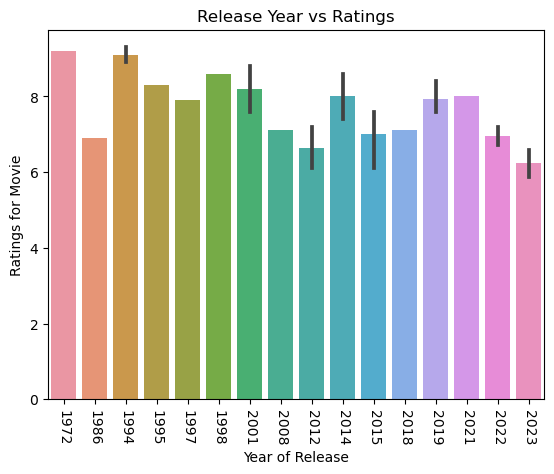

In [98]:
sns.barplot(x=movie_df['year_of_release'], y=movie_df['rating'])
plt.xlabel('Year of Release')
plt.ylabel('Ratings for Movie')
plt.title('Release Year vs Ratings')
plt.xticks(rotation=270)
plt.show()

We can observe that 1972 released movies have higher ratings than movies released in recent years

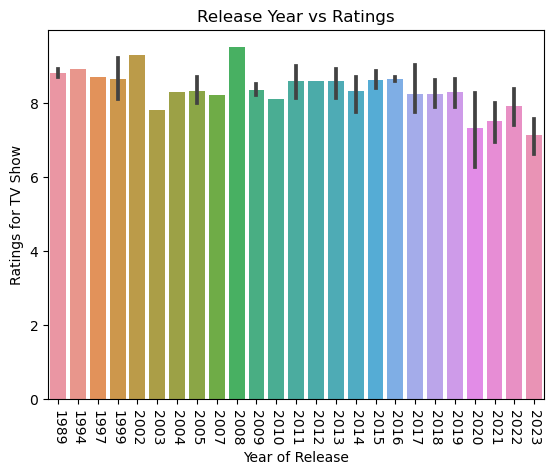

In [99]:
sns.barplot(x=tv_df['year_of_release'], y=tv_df['rating'])
plt.xlabel('Year of Release')
plt.ylabel('Ratings for TV Show')
plt.title('Release Year vs Ratings')
plt.xticks(rotation=270)
plt.show()

Unlike Movies, TV Shows which are released post 2000 have higher ratings

In [103]:
movie_df.dropna(inplace=True)

In [104]:
# sort DataFrame by rating column in ascending order
movie_df_sorted = movie_df.sort_values('rating')
movie_df_sorted.tail()

,movie_name,year_of_release,rating
68,Interstellar,2014,8.6
87,The Lord of the Rings: The Fellowship of the Ring,2001,8.8
86,Pulp Fiction,1994,8.9
46,The Godfather,1972,9.2
57,The Shawshank Redemption,1994,9.3


<Figure size 600x600 with 0 Axes>

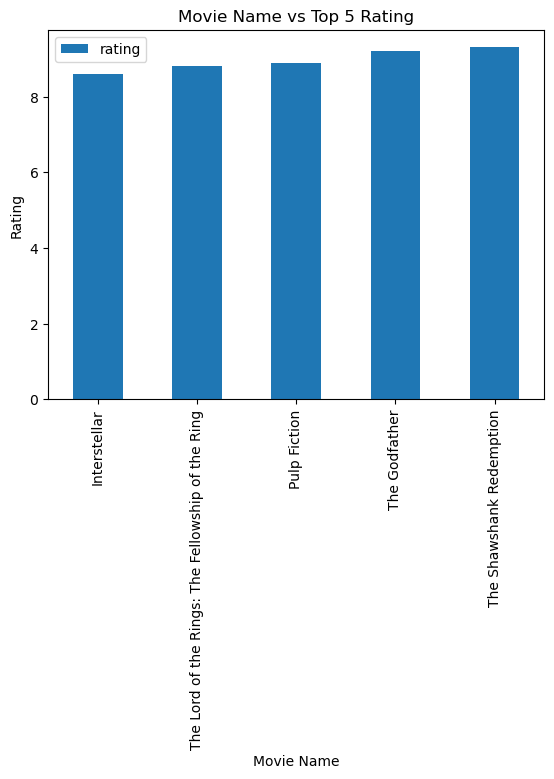

In [116]:
plt.figure(figsize=(6,6))
movie_df_sorted.tail(5).plot.bar(x='movie_name', y='rating')
plt.xlabel('Movie Name')
plt.ylabel('Rating')
plt.title('Movie Name vs Top 5 Rating')
plt.xticks(rotation=90)
plt.show()

The Shawshank Redemption and God Father are the movies which are having high rating

In [117]:
# sort DataFrame by rating column in ascending order
tv_df_sorted = tv_df.sort_values('rating')
tv_df_sorted.tail()

,tv_name,year_of_release,rating
43,The Sopranos,1999,9.2
14,Game of Thrones,2011,9.2
78,The Wire,2002,9.3
87,The Chosen,2017,9.3
19,Breaking Bad,2008,9.5


<Figure size 600x600 with 0 Axes>

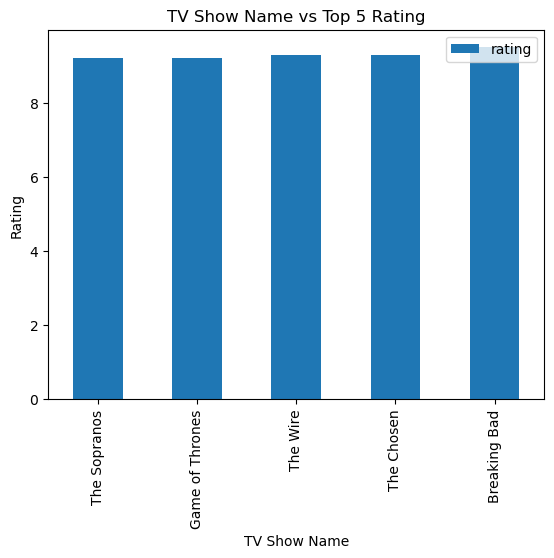

In [118]:
plt.figure(figsize=(6,6))
tv_df_sorted.tail(5).plot.bar(x='tv_name', y='rating')
plt.xlabel('TV Show Name')
plt.ylabel('Rating')
plt.title('TV Show Name vs Top 5 Rating')
plt.xticks(rotation=90)
plt.show()

Breaking Bad and The Chosen are the top 2 films which have higher rating

- Conclusion :- 
We can conclude that the Movies and TV Shows are highely rated. Breaking Bad and The Shawshank Redemption are top rated Tv Show and Movies in the IMDb List.